# Logistic Regression for Classification

## Introduction

The problem of classification deals with *categorical* data. In this problem, we wish to identify a set of data whether they belong to a particular class of category. For example, a given text message from an email, we would like to classify if it is a spam or not a spam. Another example would be given some measurement of cancer cells we wish to classify if it is benign or malignant. In this section we will learn logistic regression to solve this classification problem.

## Hypothesis Function

Let's take an example of breast cancer classification problem. Let's say depending on the cell size, an expert can identify if the cell is benign or malignant. We can plot something like the following figure.

![](https://www.dropbox.com/s/drkggfjxttwjjfu/cancer_cell_plot.png?raw=1)

In the y-axis, value of 1 means it is a malignant cell while value of 0 means it is benign. The x-axis can be considered as a normalized size of the cell with mean 0 and standard deviation of 1 (recall z-normalization).

If we can model this plot as a function $p(x)$, we can set the following criteria to classify the cells. For example, we will predict it is malignant if $p(x) \geq 0.5$, otherwise, it is benign. This means we need a function where we can model the data in a step wise manners and fulfills the following:

$$0 \leq p(x) \leq 1$$

where $p(x)$ is the probability that a cell with feature $x$ is a malignant cell. 

One of the function that we can use that have this step-wize shape and the above properties is a logistic function. A logistic function can be written as.

$$y = \frac{1}{1 + e^{-x}}$$

The plot of a logistic function looks like the following.

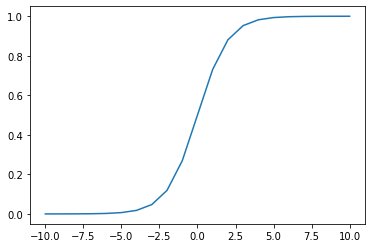

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(range(-10,11))
y = 1/(1+np.exp(-x))
plt.plot(x,y)

We can write our hypothesis as follows.

$$p(x) = \frac{1}{1 + e^{-\beta^T x}}$$


Note that in this notes we tend to omit the *hat* symbol to indicate it is the estimated parameters as in the previous notes. We will just indicate the estimated parameters as $\beta$ instead of $\hat{\beta}$. In the above equation, $\beta^Tx$ can be written as

$$\beta_0 x_0 + \beta_1 x_1$$

when $x_0 = 1$, the above equation is simply the straight line equation of linear regression.

$$\beta_0 + \beta_1 x_1$$

This is the case when we only have one feature $x_1$. If we have more than one feature, we should write $\beta^Tx$ as follows.

$$\beta_0 x_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

The above relationship shows that we can map the value of linear regression into a new function with a value from 0 to 1. This new function $p(x)$ can be considered as *an estimated probability* that $y = 1$ on input $x$. For example, if $p(x) = 0.7$ this means that 70% chance it is malignant. We can then use the following boundary conditions:
- y = 1 (malignant) if $p(x) \geq 0.5$
- y = 0 (benign) if $p(x) < 0.5$

The above conditions also means that we can classify $y=1$ when $\beta^T x \geq 0$ and $y = 0$ when $\beta^T x < 0$. We can draw these boundary conditions.

![](https://www.dropbox.com/s/ncflm4853mdy8es/decision_boundary.png?raw=1)

In the figure above, we indicated the predicted label $y$ with the orange colour. We see that when $p(x)\geq 0.5$, the data is marked as $y=1$ (orange). On the other hand, when $p(x) \leq 0.5$, the data is marked as $y=0$ (orange). The thick black line shows the decision boundary for this particular example. 

How do we get this boundary decision. Once we found the estimated values for $\beta$, we can find the value of $x$ which gives $\beta^Tx = 0$. You will work on computing the parameters $\beta$ in the problem set. For now, let's assume that you manage to find the value of $\beta_0 = -0.56$ and $\beta_1 = 1.94$. The equation $\beta^T x = 0 $ can be written as follows.

$$\beta_0 + \beta_1 x = 0$$

We can then substitute the values for $\beta$ into the equation.

$$-0.56 + 1.94 x = 0$$
$$x = 0.29 \approx 0.3$$

From the figure above, this fits where the thick line is, which is at around 0.3.

## Cost Function

Similar to linear regression, our purpose here is to find the parameters $\beta$. To do so, we will have to minimize some cost function using optimization algorithm. 

For logistic regression, we will choose the following cost function.

$$J(\beta) = \frac{1}{m} \Sigma_{i=1}^m \left\{ \begin{matrix}
-\log(p(x)) & \text{ if } y = 1\\
-\log(1 - p(x)) & \text{ if } y = 0
\end{matrix}\right.$$

We can try to understand the term inside the bracket intuitively. Let's see the case when $y=1$. In this case, the cost term is given by:

$$-\log(p(x))$$

The cost is 0 if $y = 1$ and $p(x) = 1$ because $-\log(z)$ is 0 when $z=1$. Moreover, as $p(x) \rightarrow 0$, the cost will reach $\infty$. [See plot by wolfram alpha](https://www.wolframalpha.com/input/?i=-log%28x%29+from+0+to+1).

On the other hand, when $ y = 0$, the cost term is given by:

$$-\log(1-p(x))$$

In this case, the cost is 0 when $p(x) = 0$ but it reaches $\infty$ when $p(x) \rightarrow 1$. [See plot by wolfram alpha](https://www.wolframalpha.com/input/?i=-log%281-x%29+from+0+to+1). 

We can write the overall cost function for all the data points from $i=1$ to $m$ as follows.

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

Notice that when $y^i = 1$, the function reduces to

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(p(x^i)) \right]$$

and when $y^i = 0$, the function reduces to

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(1 - p(x^i))\right]$$

## Gradient Descent

We can find the parameters $\beta$ again by using the gradient descern algorithm to perform:

$$\begin{matrix}
min & J(\beta)\\
\beta & \end{matrix}$$

The update functions for the parameters are given by

$$\beta_j = \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta)$$

The derivative of the cost function is given by

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma_{i=1}^m \left(p(x)-y^i  \right)x_j^i$$

See the appendix for the derivation. We can substitute this in to get the following update function.

$$\beta_j = \beta_j - \alpha \frac{1}{m}\Sigma_{i=1}^m \left(p(x)-y^i  \right)x_j^i$$


# Appendix

## Derivation of Logistic Regression Derivative 



We want to find $\frac{\partial}{\partial \beta_j}J(\beta)$, where

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

To simplify our derivation, we will consider each case when $y=1$ and when $y=0$. When $y=1$, the cost function is given by

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(p(x^i)) \right]$$

Derivating this with respect to $\theta$ is

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma \frac{1}{p(x)}\frac{\partial}{\partial \beta}p(x)$$

Recall that the expression for the hypothesis is

$$p(x) = \frac{1}{1 + e^{-\beta^T x}}$$

The derivative of this is given by

$$\frac{\partial}{\partial \beta_j} p(x) = - \frac{1}{(1 + e^{-\beta^T x})^2} \times -x_j \times e^{-\beta^T x}$$

or

$$\frac{\partial}{\partial \beta_j} p(x) =  \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})^2} $$

We can then now substitute this back 

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma (1 + e^{-\beta^T x}) \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})^2}$$

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma  \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})}$$

This can be written as

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma  p(x) x_j e^{-\beta^T x}$$
This is for the case of $y = 1$.

Now let's do the same for $y = 0$, the cost function is given by

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(1 - p(x^i))\right]$$

Derivating this with respect to $\theta$ gives

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma \frac{1}{1 - p(x)}\frac{\partial}{\partial \beta}p(x)$$


Substituting expression for the hypothesis function and its derivative  gives us

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma \frac{1}{1 - \frac{1}{1 + e^{-\beta^T x}}}  \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})^2} $$


$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma \frac{1 + e^{-\beta^T x}}{e^{-\beta^T x}}  \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})^2} $$

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma \frac{x_j}{(1+e^{\beta^T x})} $$

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma p(x) x_j$$
This is for $y = 0$.

Combining for both cases $y=0$ and $y=1$, we have

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma_{i=1}^m y^i p(x) x_j e^{-\beta^T x} + (y^i - 1)  p(x) x_j^i$$


$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma_{i=1}^m y^i p(x) x_j e^{-\beta^T x} + y^i   p(x) x_j - p(x) x_j^i$$

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma_{i=1}^m \left(y^i p(x)(1 + e^{-\beta^T x})  - p(x) \right)x_j^i$$
$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma_{i=1}^m \left(y^i   - p(x) \right)x_j^i$$
$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma_{i=1}^m \left(p(x)-y^i  \right)x_j^i$$